### Diffusion Equation Backward Euler and Neumann Boundary Condition

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class gas_canistor:
    def __init__(self, x=0.5, radius = 0.005, concentration = 1.0):
        self.radius = radius
        self.x = x
        self.lower_bound = self.x - self.radius
        self.upper_bound = self.x + self.radius
        self.concentration = concentration

def f(canistor: gas_canistor, x: np.array):
    return np.where((x >= canistor.lower_bound) & (x <= canistor.upper_bound), 1, 0)

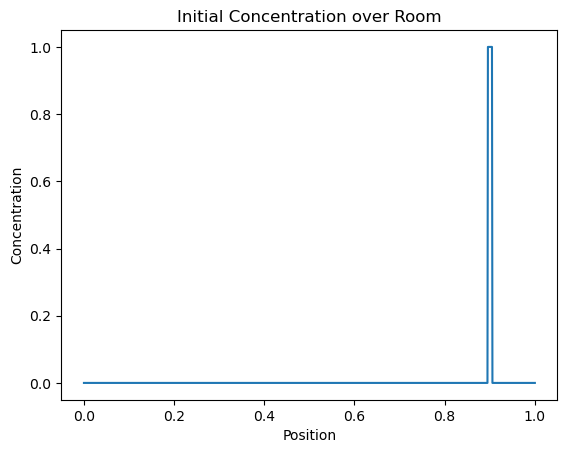

In [14]:
can_1 = gas_canistor(x=0.9)
x = np.linspace(0.0, 1.0, 1000)
concentrations = f(can_1, x)

plt.plot(x, concentrations)
plt.title('Initial Concentration over Room')
plt.ylabel('Concentration')
plt.xlabel('Position')
plt.savefig("toy_problem_initial_concentration.svg")

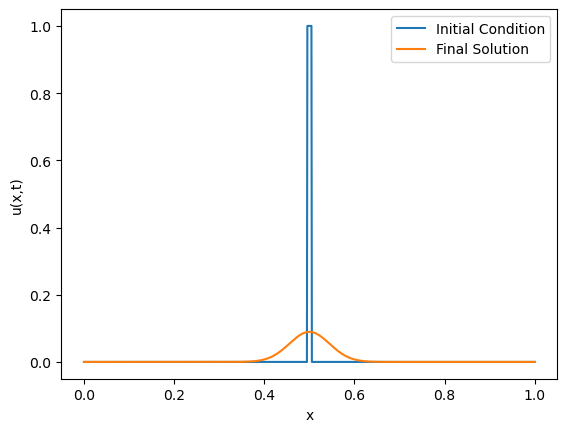

In [16]:
# Parameters
L = 1.0                 # Length of interval
T = 0.001                # Total time
Nx = 1000                # Number of spatial points
Nt = 100                # Number of time steps

dx = L / (Nx - 1)       # Spatial step size
dt = T / Nt             # Time step size
C = dt / dx**2


x = np.linspace(0, L, Nx)

canistor = gas_canistor()
u_initial = f(canistor, x)

u = np.copy(u_initial)

A = np.zeros((Nx, Nx))

for i in range(1, Nx - 1):
    A[i, i - 1] = -C
    A[i, i] = 1 + 2 * C
    A[i, i + 1] = -C

A[0, 0] = 1 + 2 * C
A[0, 1] = -2 * C   
A[Nx - 1, Nx - 2] = -2 * C 
A[Nx - 1, Nx - 1] = 1 + 2 * C


for n in range(Nt):
    u = np.linalg.solve(A, u)

# Plotting the final solution
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u, label="Final Solution")
plt.xlabel("x")
plt.ylabel("$u(x,t)$")
plt.legend()
plt.show()